In [2]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [3]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,stratify=y,random_state=1)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

##Eigendecomposition of the covariance matrix.

In [5]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.7095539  2.63606471 1.55728758 0.93422662 0.85129454 0.5709688
 0.46462025 0.37764772 0.10409155 0.14951983 0.21165109 0.2630501
 0.27571434]


In [6]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

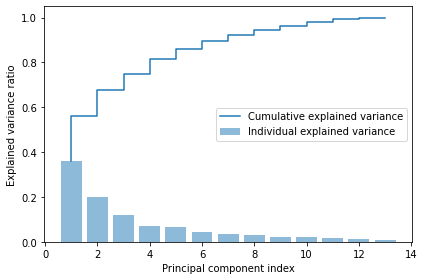

In [7]:
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5,
        label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp,
         label='Cumulative explained variance')
plt.plot()
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

# Feature transformation

In [8]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs

[(4.709553901660287,
  array([-0.14119433,  0.24946815, -0.05104853,  0.19890851, -0.1444494 ,
         -0.40472564, -0.42654202,  0.29573373, -0.32620144,  0.07420694,
         -0.29277478, -0.37482201, -0.2889145 ])),
 (2.636064710802364,
  array([-0.46732089, -0.26876924, -0.27660192,  0.01955098, -0.32120489,
         -0.04839313,  0.00936768, -0.00146817, -0.04087554, -0.53982087,
          0.27536907,  0.19149315, -0.34828709])),
 (1.5572875825492223,
  array([ 0.18497972, -0.11558438, -0.62580603, -0.63022498, -0.06808315,
         -0.14454263, -0.16109721, -0.20830498, -0.10392829,  0.07463025,
         -0.04770525, -0.16694498,  0.14905602])),
 (0.9342266236726287,
  array([-0.06135175,  0.50736306, -0.23358668,  0.06619111, -0.21808618,
          0.10100723,  0.07511595, -0.33032862,  0.45117801, -0.01323281,
         -0.46488038,  0.19553794, -0.22195876])),
 (0.8512945398770673,
  array([-0.25730345, -0.04631822, -0.07939612,  0.14036996,  0.75131283,
         -0.13576848, 

In [9]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.14119433 -0.46732089]
 [ 0.24946815 -0.26876924]
 [-0.05104853 -0.27660192]
 [ 0.19890851  0.01955098]
 [-0.1444494  -0.32120489]
 [-0.40472564 -0.04839313]
 [-0.42654202  0.00936768]
 [ 0.29573373 -0.00146817]
 [-0.32620144 -0.04087554]
 [ 0.07420694 -0.53982087]
 [-0.29277478  0.27536907]
 [-0.37482201  0.19149315]
 [-0.2889145  -0.34828709]]


In [10]:
X_train_std[0].dot(w)

array([-3.85641154, -2.66984554])

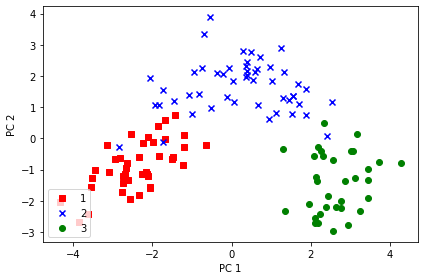

In [11]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

#Principal component analysis in scikit-learn

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.35935182, 0.20113893, 0.11882529, 0.07128404, 0.0649561 ,
       0.04356648, 0.03545179, 0.02881555, 0.02103776, 0.02007144,
       0.01614956, 0.01140877, 0.00794247])

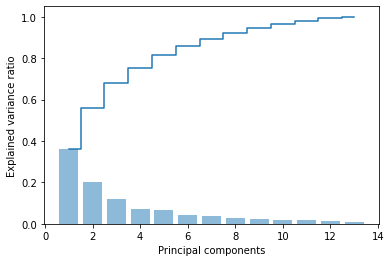

In [13]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

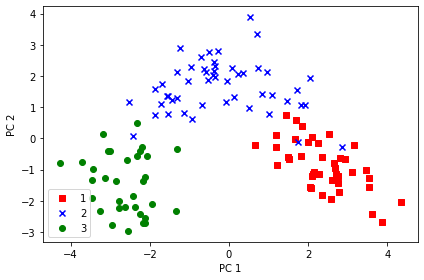

In [14]:
pca = PCA(n_components=2)
X_train_pca_skl = pca.fit_transform(X_train_std)
X_test_pca_skl = pca.transform(X_test_std)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca_skl[y_train == l, 0], X_train_pca_skl[y_train == l, 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

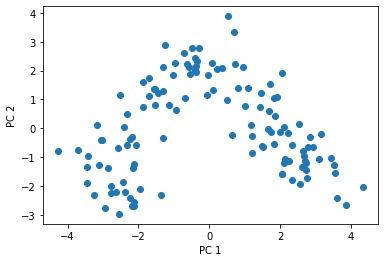

In [15]:
plt.scatter(X_train_pca_skl[:, 0], X_train_pca_skl[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [16]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.002):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
 
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  #print(Z)
  plt.contourf(xx1, xx2, Z, alpha=0.3)
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

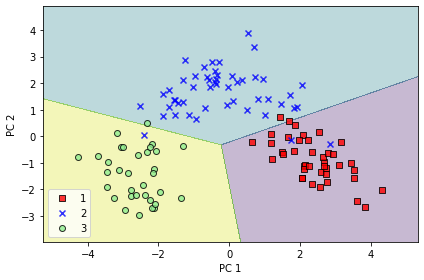

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca_skl, y_train)
plot_decision_regions(X_train_pca_skl, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

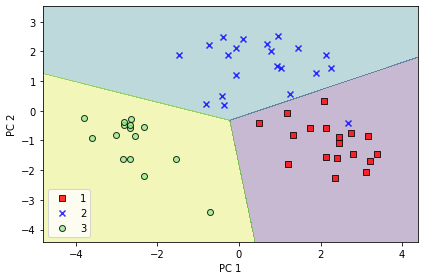

In [18]:
plot_decision_regions(X_test_pca_skl, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()